In [ ]:
%pip install datasets
%pip install accelerate

In [7]:
import torch
from config import get_config, get_weights_file_path
from train import get_model, get_dataset, train_model
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, Trainer
from datasets import load_dataset
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## My Custom Transformer Model

In [ ]:
# Train the model
config = get_config()
train_model(config)

Using device cuda


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Max length of source sentence: 53
Max length of target sentence: 1


Processing epoch 00: 100%|██████████| 1193/1193 [01:42<00:00, 11.62it/s, loss=0.723]


--------------------------------------------------------------------------------
SOURCE: Northfield Bancorp goes ex-dividend tomorrow
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Publicis Groupe S.A. reports FY results
TARGET: 2
PREDICTED: 2


Processing epoch 01: 100%|██████████| 1193/1193 [01:38<00:00, 12.08it/s, loss=0.689]


--------------------------------------------------------------------------------
SOURCE: Tyson Foods EPS misses by $0.01, misses on revenue
TARGET: 0
PREDICTED: 0
--------------------------------------------------------------------------------
SOURCE: Exclusive: Russia's VTB plans to expand grain business and then exit - CEO
TARGET: 2
PREDICTED: 2


Processing epoch 02: 100%|██████████| 1193/1193 [01:38<00:00, 12.09it/s, loss=0.577]


--------------------------------------------------------------------------------
SOURCE: Rapid7 (RPD) Q4 Earnings and Revenues Beat Estimates
TARGET: 1
PREDICTED: 1
--------------------------------------------------------------------------------
SOURCE: EUR/USD Mid-Session Technical Analysis for December 17, 2019
TARGET: 2
PREDICTED: 0


Processing epoch 03: 100%|██████████| 1193/1193 [01:47<00:00, 11.11it/s, loss=0.449]


--------------------------------------------------------------------------------
SOURCE: Dyadic International : Announces Achieving Human Like Glycan Structures From Its Engineere... #DyadicInternational… https://t.co/eVfCZjC60j
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Options Trader Bets on Monster Micron Move
TARGET: 2
PREDICTED: 2


Processing epoch 04: 100%|██████████| 1193/1193 [01:39<00:00, 12.04it/s, loss=0.448]


--------------------------------------------------------------------------------
SOURCE: One of the world's rarest butterflies is thriving in an unlikely place: a military artillery range https://t.co/D262xE8iFP
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: $NYMT out 1.82 from $1.60 @here
TARGET: 1
PREDICTED: 2


Processing epoch 05: 100%|██████████| 1193/1193 [01:37<00:00, 12.21it/s, loss=0.607]


--------------------------------------------------------------------------------
SOURCE: $GLD $SLV - Gold & Silver Update: December May Be A Bottom. Read more: https://t.co/c0d06nlqQJ #trading #finance #stocks
TARGET: 1
PREDICTED: 1
--------------------------------------------------------------------------------
SOURCE: $IIVI - II-VI EPS in-line, beats on revenue https://t.co/CXUZw29Z3g
TARGET: 1
PREDICTED: 1


Processing epoch 06: 100%|██████████| 1193/1193 [01:36<00:00, 12.40it/s, loss=0.452]


--------------------------------------------------------------------------------
SOURCE: Little impact on Netflix from Disney Plus launch - Credit Suisse
TARGET: 2
PREDICTED: 1
--------------------------------------------------------------------------------
SOURCE: OneMain Holdings EPS beats by $0.21, beats on revenue
TARGET: 1
PREDICTED: 1


Processing epoch 07: 100%|██████████| 1193/1193 [01:38<00:00, 12.13it/s, loss=0.451]


--------------------------------------------------------------------------------
SOURCE: Edited Transcript of SFUN earnings conference call or presentation 18-Nov-19 12:00pm GMT
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Eidos up 13% on sustained benefit of AG10 in ATTR-CM
TARGET: 1
PREDICTED: 1


Processing epoch 08: 100%|██████████| 1193/1193 [01:39<00:00, 12.01it/s, loss=0.449]


--------------------------------------------------------------------------------
SOURCE: Publicis Groupe S.A. reports FY results
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Home Depot stock is still a good investment despite rare misstep: analysts
TARGET: 1
PREDICTED: 1


Processing epoch 09: 100%|██████████| 1193/1193 [01:38<00:00, 12.06it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: $RHHBY - Genentech nabs accelerated review status for risdiplam https://t.co/TlPBstlehr
TARGET: 1
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Is Grifols (BME:GRF) A Risky Investment?
TARGET: 2
PREDICTED: 2


Processing epoch 10: 100%|██████████| 1193/1193 [01:43<00:00, 11.52it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: $EQNR $SU - Siccar Point attracts bids as high as nearly $2B - Reuters https://t.co/CMSO3XjoN1
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: SEC investigator https://t.co/xn4CBYig52
TARGET: 2
PREDICTED: 2


Processing epoch 11: 100%|██████████| 1193/1193 [01:38<00:00, 12.17it/s, loss=0.634]


--------------------------------------------------------------------------------
SOURCE: Key Events In The Holiday Shortened Week https://t.co/n7Q9OeE5yu
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Eurozone PMI Shows Economy Close To Stagnation. Sign up for updates on Seeking Alpha! https://t.co/h0OGX7AT9k #economy #finance #business
TARGET: 0
PREDICTED: 2


Processing epoch 12: 100%|██████████| 1193/1193 [01:37<00:00, 12.27it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: If you are throwing deep you definitely want to be targeting Blake Jarwin lol
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Gold futures climb nearly 3%, settling at the highest level since December 2012 https://t.co/um1vukp9mc
TARGET: 1
PREDICTED: 1


Processing epoch 13: 100%|██████████| 1193/1193 [01:37<00:00, 12.28it/s, loss=0.450]


--------------------------------------------------------------------------------
SOURCE: Spirit MTA REIT (NYSE:SMTA) Shares Have Generated A Total Return Of 34% In The Last Year
TARGET: 1
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Oil - The Shale Treadmill Is Going To Be A Thing Of Beauty. https://t.co/Efdq6nuU9b #stockmarket #economy #investing
TARGET: 1
PREDICTED: 0


Processing epoch 14: 100%|██████████| 1193/1193 [01:36<00:00, 12.35it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: UPDATE 2-Crunch talks lead to Emirates order for 30 Boeing Dreamliners
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Global Risks to Extend Czech Rate Lockdown: Decision Day Guide
TARGET: 2
PREDICTED: 2


Processing epoch 15: 100%|██████████| 1193/1193 [01:36<00:00, 12.41it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: STOCKS AT THE OPEN:
- Dow up 3.90% 
- Nasdaq up 2.68% 
- S&P up 2.76% https://t.co/xVranG4Mbz
TARGET: 1
PREDICTED: 1
--------------------------------------------------------------------------------
SOURCE: Chubb to buy stake in China's Huatai Insurance for $1.53 billion #economy #MarketScreener https://t.co/sUAx6evkmj https://t.co/DVUL8EMQ0t
TARGET: 2
PREDICTED: 2


Processing epoch 16: 100%|██████████| 1193/1193 [01:36<00:00, 12.30it/s, loss=0.448]


--------------------------------------------------------------------------------
SOURCE: The RMR Group Inc. Announces First Quarter Fiscal 2020 Results
TARGET: 2
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Becton Dickinson's stock tumbles, as lowered earnings guidance offsets profit beat
TARGET: 0
PREDICTED: 0


Processing epoch 17: 100%|██████████| 1193/1193 [01:37<00:00, 12.25it/s, loss=0.501]


--------------------------------------------------------------------------------
SOURCE: "There is every reason to believe that the economic rebound, when it comes, can be robust," Fed Chair Jerome Powell… https://t.co/Ovi6BRM3TK
TARGET: 1
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Bobit Business Media’s Chris Brown Wins Eddie Award For Business Fleet Article  https://t.co/m1YoKG5j2w
TARGET: 2
PREDICTED: 1


Processing epoch 18: 100%|██████████| 1193/1193 [01:37<00:00, 12.24it/s, loss=0.447]


--------------------------------------------------------------------------------
SOURCE: Congratulations to Phreesia (NYSE: $PHR) who was just named 2020 Best in KLAS for Patient Intake Management 

Read... https://t.co/lgQFrG7lOr
TARGET: 1
PREDICTED: 2
--------------------------------------------------------------------------------
SOURCE: Here are the best analyst calls of the week on Wall Street including Disney and a satellite play https://t.co/u9r1QPQli5
TARGET: 2
PREDICTED: 2


Processing epoch 19: 100%|██████████| 1193/1193 [01:37<00:00, 12.22it/s, loss=0.446]


--------------------------------------------------------------------------------
SOURCE: Revised Mexican data paints an even bleaker picture of a stagnant economy https://t.co/It97z86YO1
TARGET: 0
PREDICTED: 0
--------------------------------------------------------------------------------
SOURCE: $STZ (+4.9% pre) UBS Upgrades Constellation Brands (STZ) to Buy, $180 PT

https://t.co/y3Tfnn7kfo
TARGET: 1
PREDICTED: 1


In [8]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
config = get_config()
train_dataloader, val_dataloader, tokenizer_source, tokenizer_target = get_dataset(config)
model = get_model(config, tokenizer_source.get_vocab_size(), tokenizer_target.get_vocab_size()).to(device)

# Load the pretrained weights
model_filename = get_weights_file_path(config, '19')
state = torch.load(model_filename)
model.load_state_dict(state['model_state_dict'])

Using device: cuda
Max length of source sentence: 53
Max length of target sentence: 1


<All keys matched successfully>

## Base Pretrained Model

In [9]:
pretrained_model = pipeline(task = 'sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

## Finetuned Pretrained Model

In [64]:
def tokenize_function(examples):
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [65]:
def switch_labels(example):
    if example['label'] == 1:
        example['label'] = 2
    elif example['label'] == 2:
        example['label'] = 1
    return example

In [67]:
train_dataset = load_dataset('zeroshot/twitter-financial-news-sentiment', split = 'train')
validation_dataset = load_dataset('zeroshot/twitter-financial-news-sentiment', split = 'validation')
processed_train_dataset = train_dataset.map(switch_labels)
processed_validation_dataset = validation_dataset.map(switch_labels)

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [68]:
raw_dataset = load_dataset('zeroshot/twitter-financial-news-sentiment')
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

tokenized_train = processed_train_dataset.map(tokenize_function, batched = True).shuffle()
tokenized_validation = processed_validation_dataset.map(tokenize_function, batched = True).shuffle()

finetuned_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
trainer = Trainer(model = finetuned_model, train_dataset = tokenized_train, tokenizer = tokenizer)

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maxim

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.

In [69]:
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.534400
1000,0.474700
1500,0.351600
2000,0.280700
2500,0.281600
3000,0.145000
3500,0.123400


TrainOutput(global_step=3579, training_loss=0.30995200898734576, metrics={'train_runtime': 292.3309, 'train_samples_per_second': 97.934, 'train_steps_per_second': 12.243, 'total_flos': 692567446479678.0, 'train_loss': 0.30995200898734576, 'epoch': 3.0})

In [70]:
sentiment_analysis_finetuned_model = np.argmax(trainer.predict(tokenized_validation).predictions, axis = -1)

## Model Comparison

In [71]:
def analyse(model, device, tokenizer_source, tokenizer_target, max_len, text):
    model.eval()
    with torch.no_grad():
        source = tokenizer_source.encode(text)
        source = torch.cat([
            torch.tensor([tokenizer_source.token_to_id('[SOS]')], dtype=torch.int64),
            torch.tensor(source.ids, dtype=torch.int64),
            torch.tensor([tokenizer_source.token_to_id('[EOS]')], dtype=torch.int64),
            torch.tensor([tokenizer_source.token_to_id('[PAD]')] * (max_len - len(source.ids) - 2), dtype=torch.int64)
        ], dim=0).to(device)
        source_mask = (source != tokenizer_source.token_to_id('[PAD]')).unsqueeze(0).unsqueeze(0).int().to(device)
        encoder_output = model.encode(source, source_mask)
        decoder_input = torch.empty(1, 1).fill_(tokenizer_target.token_to_id('[SOS]')).type_as(source).to(device)
        while decoder_input.size(1) < max_len:
            decoder_mask = torch.triu(torch.ones((1, decoder_input.size(1), decoder_input.size(1))), diagonal=1).type(torch.int).type_as(source_mask).to(device)
            output = model.decode(encoder_output, source_mask, decoder_input, decoder_mask)
            probabilities = model.project(output[:, -1])
            _, next_word = torch.max(probabilities, dim=1)
            decoder_input = torch.cat([decoder_input, torch.empty(1, 1).type_as(source).fill_(next_word.item()).to(device)], dim=1)
            if next_word == tokenizer_target.token_to_id('[EOS]'):
                break
    return tokenizer_target.decode(decoder_input[0].tolist())

In [73]:
validation_dataset = load_dataset('zeroshot/twitter-financial-news-sentiment', split = 'validation')
confusion_matrix_custom_model = torch.zeros((3, 3))
confusion_matrix_pretrained_model = torch.zeros((3, 3))
confusion_matrix_finetuned_model = torch.zeros((3, 3))
base_pretrained_mapping = {'negative': 0, 'positive': 1, 'neutral': 2}
finetuned_pretrained_mapping = {0: 0, 1: 2, 2: 1}

for idx, item in enumerate(tqdm(validation_dataset)):
    text = item['text']
    expected_label = item['label']
    sentiment_analysis_custom_model = int(analyse(model, device, tokenizer_source, tokenizer_target, 64, text))
    sentiment_analysis_pretrained_model = base_pretrained_mapping[pretrained_model(text)[0]['label']]
    confusion_matrix_custom_model[expected_label][sentiment_analysis_custom_model] += 1
    confusion_matrix_pretrained_model[expected_label][sentiment_analysis_pretrained_model] += 1
    confusion_matrix_finetuned_model[expected_label][finetuned_pretrained_mapping[sentiment_analysis_finetuned_model[idx]]] += 1

print("Custom Model Accuracy: ", (confusion_matrix_custom_model[0][0] + confusion_matrix_custom_model[1][1] + confusion_matrix_custom_model[2][2]) / torch.sum(confusion_matrix_custom_model))
print("Pretrained Model Accuracy: ", (confusion_matrix_pretrained_model[0][0] + confusion_matrix_pretrained_model[1][1] + confusion_matrix_pretrained_model[2][2]) / torch.sum(confusion_matrix_pretrained_model))
print("Finetuned Model Accuracy: ", (confusion_matrix_finetuned_model[0][0] + confusion_matrix_finetuned_model[1][1] + confusion_matrix_finetuned_model[2][2]) / torch.sum(confusion_matrix_finetuned_model))

100%|██████████| 2388/2388 [07:39<00:00,  5.20it/s]


Custom Model Accuracy:  tensor(0.8103)
Pretrained Model Accuracy:  tensor(0.7031)
Finetuned Model Accuracy:  tensor(0.4858)


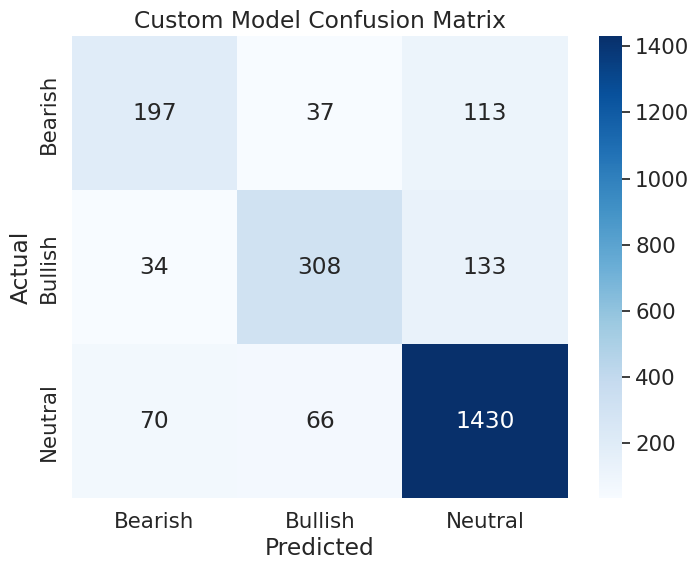

In [82]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_custom_model.numpy(), annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Bearish', 'Bullish', 'Neutral'],
            yticklabels=['Bearish', 'Bullish', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Custom Model Confusion Matrix')
plt.show()

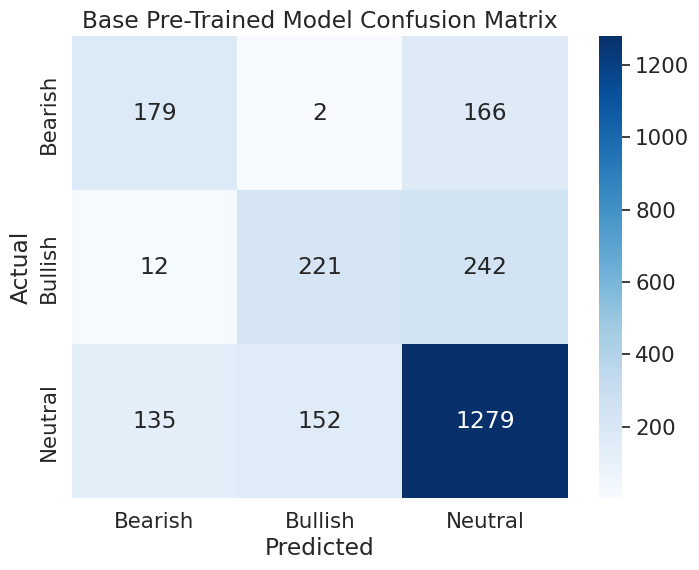

In [84]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_pretrained_model.numpy(), annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Bearish', 'Bullish', 'Neutral'],
            yticklabels=['Bearish', 'Bullish', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Base Pre-Trained Model Confusion Matrix')
plt.show()

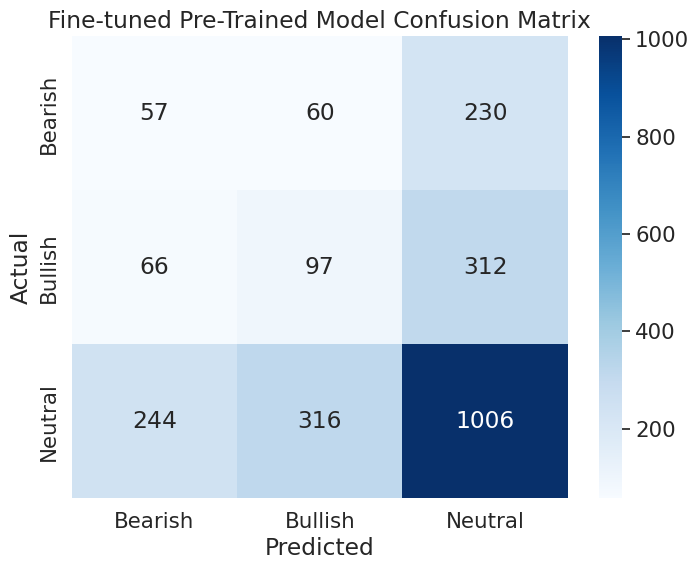

In [85]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_finetuned_model.numpy(), annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Bearish', 'Bullish', 'Neutral'],
            yticklabels=['Bearish', 'Bullish', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fine-tuned Pre-Trained Model Confusion Matrix')
plt.show()

##Demo

In [89]:
sentiment_mapping = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
tweet = "JPMC is looking to make a run in today's market."
sentiment_prediction = int(analyse(model, device, tokenizer_source, tokenizer_target, 64, tweet))
print("Model predicts: ", sentiment_mapping[sentiment_prediction])

Model predicts:  Bullish


In [90]:
sentiment_mapping = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
tweet = "GOOG is getting hit with major lawsuit."
sentiment_prediction = int(analyse(model, device, tokenizer_source, tokenizer_target, 64, tweet))
print("Model predicts: ", sentiment_mapping[sentiment_prediction])

Model predicts:  Bearish


In [91]:
sentiment_mapping = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
tweet = "The sky is blue."
sentiment_prediction = int(analyse(model, device, tokenizer_source, tokenizer_target, 64, tweet))
print("Model predicts: ", sentiment_mapping[sentiment_prediction])

Model predicts:  Neutral
